# Demo for <code>bclr</code>
Via examples from <i>Bayesian changepoint detection via logistic regression <br>
and the topological analysis of image series</i> by Thomas, Jauch, and Matteson (2024)

In [17]:
import bclr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Some helper functions (used to generate the first video below)

In [46]:
vid = bclr.gen_sim(1)[0] # generate a single 50 frame 50 x 50 video
std_vid = bclr.std_video(vid) #standardize video to have framewise mean zero and variance 1

## Analysis for $V^{(1)}$ (first video mentioned where $\kappa^*=25$)

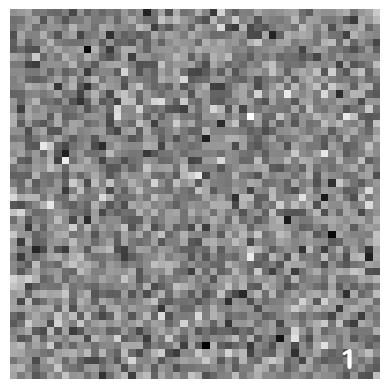

In [51]:
# The aforementioned video...
from IPython.display import Image
Image(open('experiments/Sim25.gif','rb').read())

In [10]:
prior_mean = np.repeat(0, 36)
prior_cov = np.diag(np.repeat(3, 36))

In [36]:
exp1_vid1_TDA = pd.read_csv("experiments/NoiseDataNormalizedPersStats.csv", index_col=0)

In [38]:
np.random.seed(3094420) #Try out a few values here...
exp1_vid1_TDAbclr = bclr.BayesCC(exp1_vid1_TDA.to_numpy(), prior_mean=prior_mean, prior_cov=prior_cov, 
                              n_iter=5000)
exp1_vid1_TDAbclr.fit()

╒════════╤════════╕
│   25.0 │   26.0 │
╞════════╪════════╡
│ 0.9168 │ 0.0832 │
╘════════╧════════╛


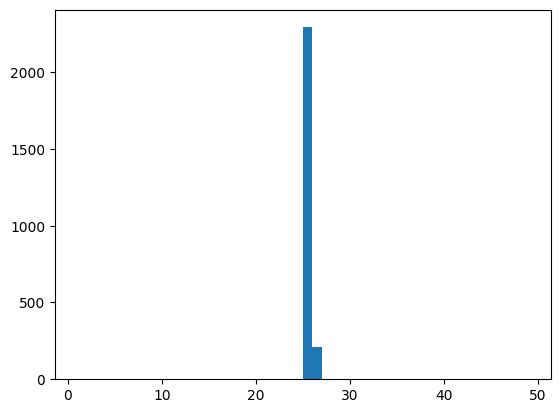

In [42]:
exp1_vid1_TDAbclr.transform()
hist = plt.hist(exp1_vid1_TDAbclr.post_k, bins=np.arange(1, 50))

In [43]:
exp1_vid1_PCA = pd.read_csv("experiments/NoiseDataNormalizedPCA.csv", index_col=0)

In [44]:
np.random.seed(1880089) #Try out a few values here...
exp1_vid1_PCAbclr = bclr.BayesCC(exp1_vid1_PCA.to_numpy(), prior_mean=prior_mean, prior_cov=prior_cov, 
                              n_iter=5000)
exp1_vid1_PCAbclr.fit()

╒════════╤════════╤════════╤════════╤════════╕
│   21.0 │   22.0 │   23.0 │   24.0 │   25.0 │
╞════════╪════════╪════════╪════════╪════════╡
│ 0.4588 │ 0.0852 │ 0.2544 │ 0.1996 │  0.002 │
╘════════╧════════╧════════╧════════╧════════╛


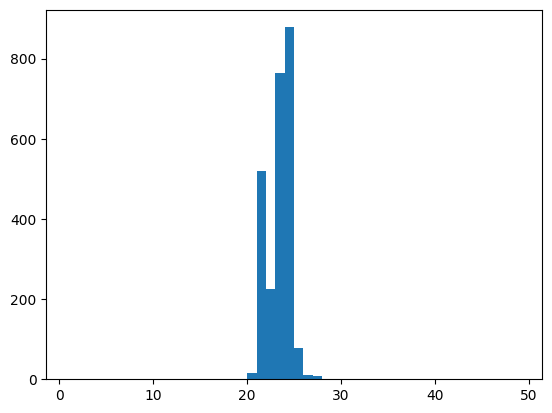

In [45]:
exp1_vid1_PCAbclr.transform()
hist = plt.hist(exp1_vid1_bclr.post_k, bins=np.arange(1, 50))

## Analysis for the nanoparticle video

In [109]:
nano = pd.read_csv("experiments/PersistenceStatisticsPtCeO2_6Nanoparticle.csv", index_col=0)

np.random.seed(88934010)
nano = nano.to_numpy()
nano_bclr = bclr.BayesCC(nano, prior_mean=prior_mean, prior_cov=prior_cov, 
                              n_iter=5000, scaled=False)
nano_bclr.fit()

╒═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│   209.0 │   210.0 │   211.0 │   212.0 │   213.0 │   214.0 │   215.0 │   216.0 │
╞═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│  0.0164 │  0.3932 │  0.3068 │  0.0128 │  0.0012 │   0.268 │  0.0008 │  0.0008 │
╘═════════╧═════════╧═════════╧═════════╧═════════╧═════════╧═════════╧═════════╛


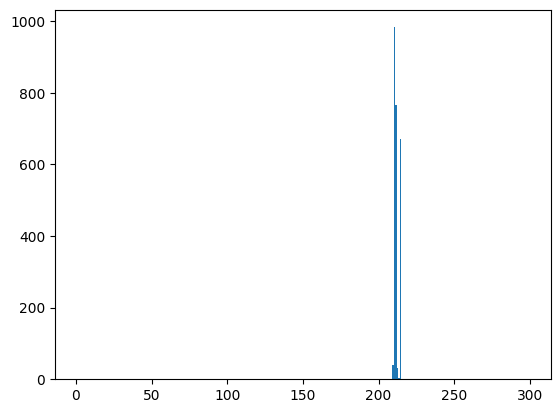

In [110]:
nano_bclr.transform()
hist2 = plt.hist(nano_bclr.post_k, bins=np.arange(1, 300))

In [111]:
import changeforest
changeforest.changeforest(nano_bclr.X)

                    best_split max_gain p_value
(0, 300]                   214   135.53   0.005
 ¦--(0, 214]               147   24.692   0.005
 ¦   ¦--(0, 147]            66   -3.624    0.48
 ¦   °--(147, 214]         161     1.02   0.835
 °--(214, 300]             217  -18.904       1

In [113]:
import ruptures as rpt
rpt.Dynp(model='rbf', jump=1, min_size=2).fit_predict(nano_bclr.X, n_bkps=1)

[214, 300]